EXPLORATORY DATA ANALYSIS(EDA) ON RETAIL SALES DATA 

In [139]:
#STEP 1 : IMPORT LIABRARIES 

In [140]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [141]:
#STEP 2 : DATA LOADING AND CLEEANING 

In [142]:

df = pd.DataFrame(d)
print(" Data has beeen Imported")
df.tail()

 Data has beeen Imported


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [144]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [145]:
print("Total sales : {}".format(df["Quantity"].sum()))
print("Total Profit : {}".format(df["Total Amount"].sum()))

Total sales : 2514
Total Profit : 456000


In [146]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [147]:
df.duplicated().sum()

np.int64(0)

In [148]:
#STEP 3 : DESCRIPTIVE STATISTICS 

In [149]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [150]:
#STEP 4 : TIME SERIES ANALYSIS

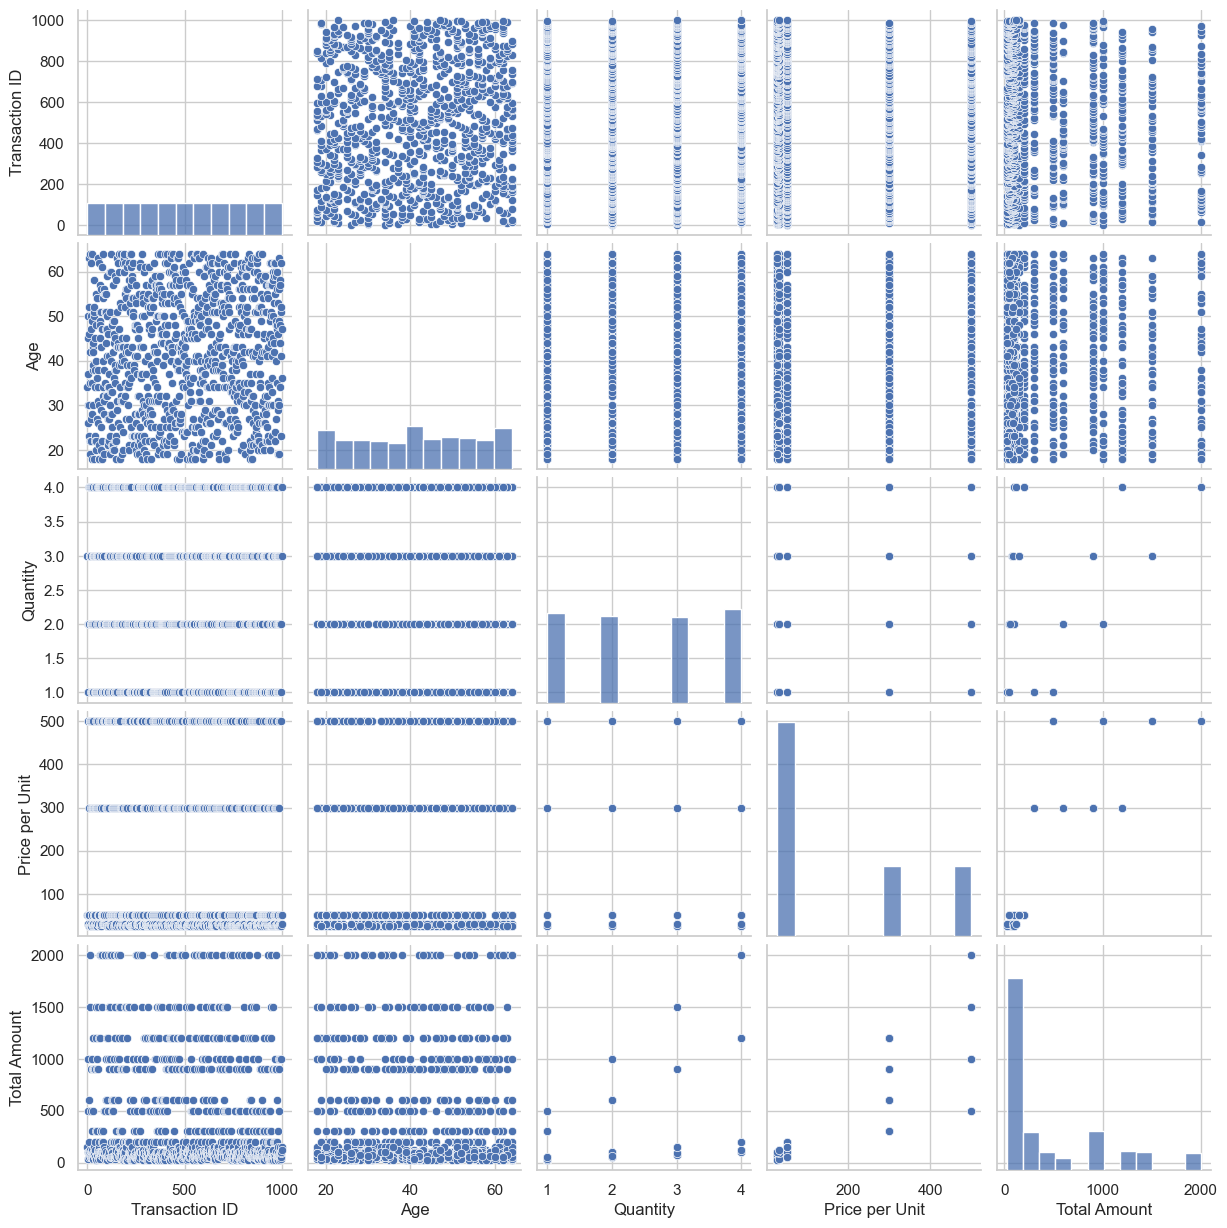

In [151]:
sns.pairplot(df)

In [152]:
#STEP 5 : CUSTOMER AND PRODUCT ANALYSIS WITH VISUALIZATION

df["Product Category"].value_counts()

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

<Axes: xlabel='Product Category', ylabel='count'>

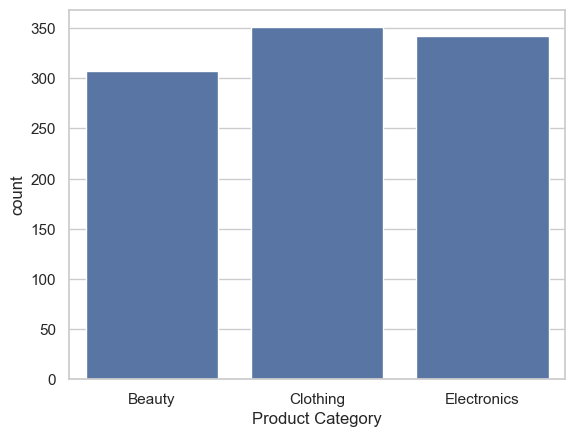

In [153]:
sns.countplot(x=df["Product Category"])

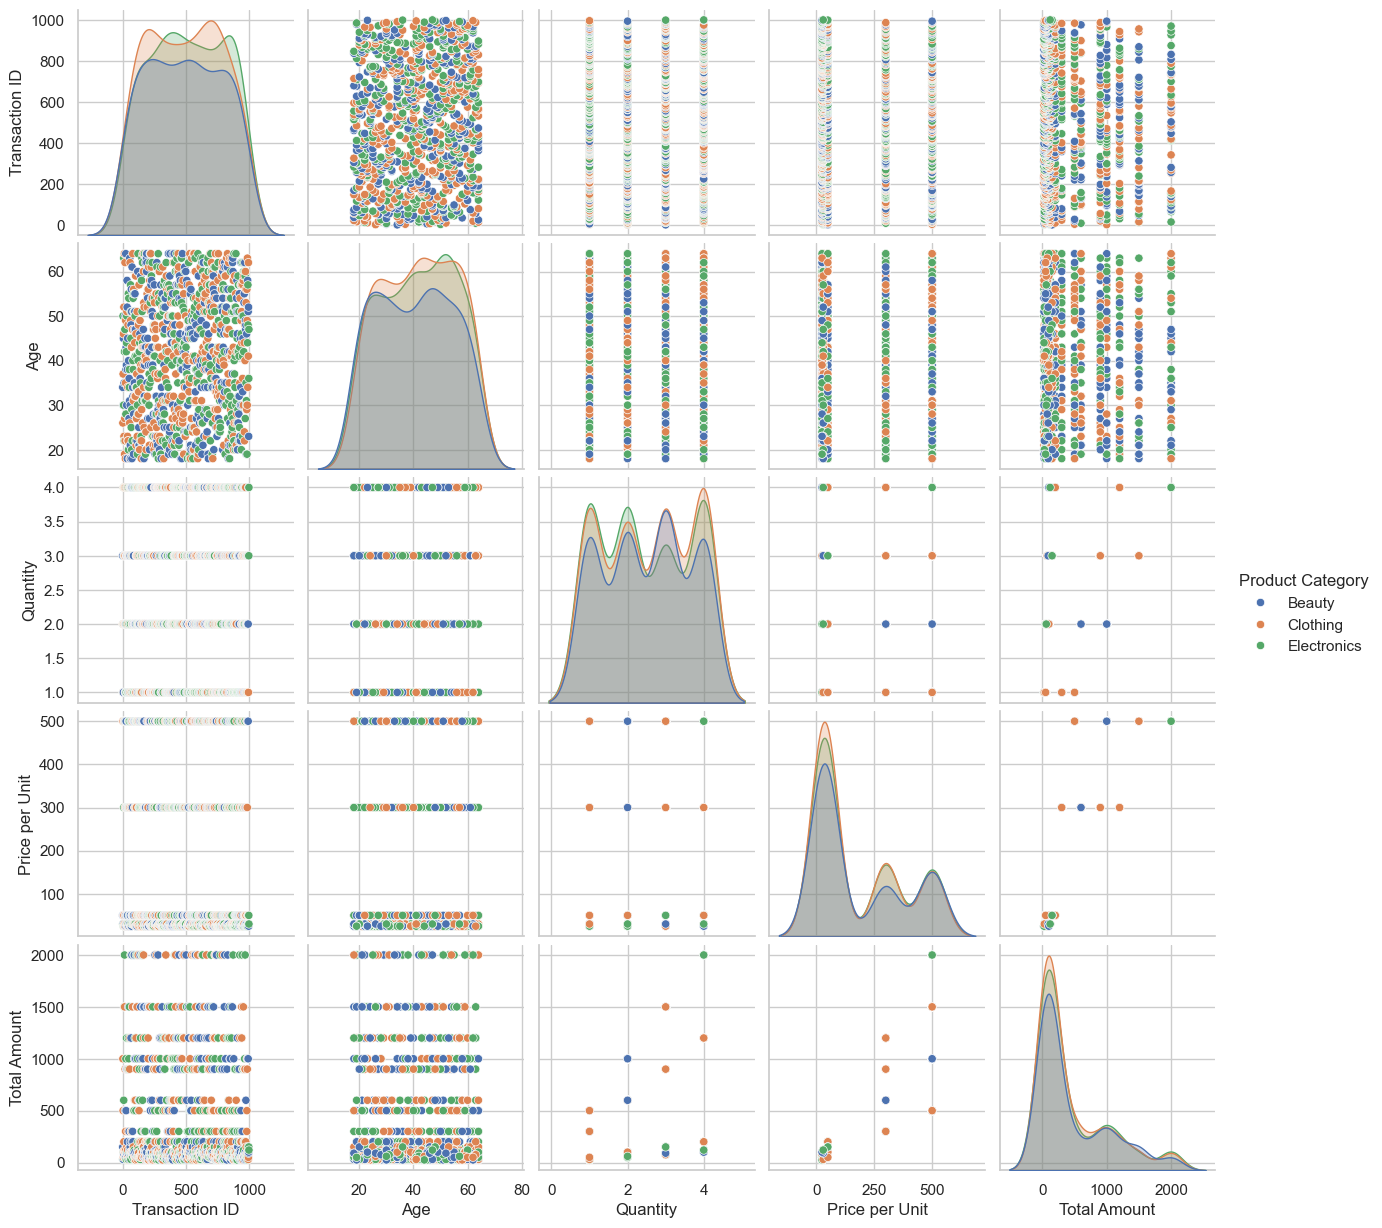

In [154]:
sns.pairplot(df, hue="Product Category")

In [155]:
p = df.groupby("Product Category")[["Quantity","Total Amount"]].sum()
p

,Quantity,Total Amount
Product Category,,
Beauty,771,143515
Clothing,894,155580
Electronics,849,156905


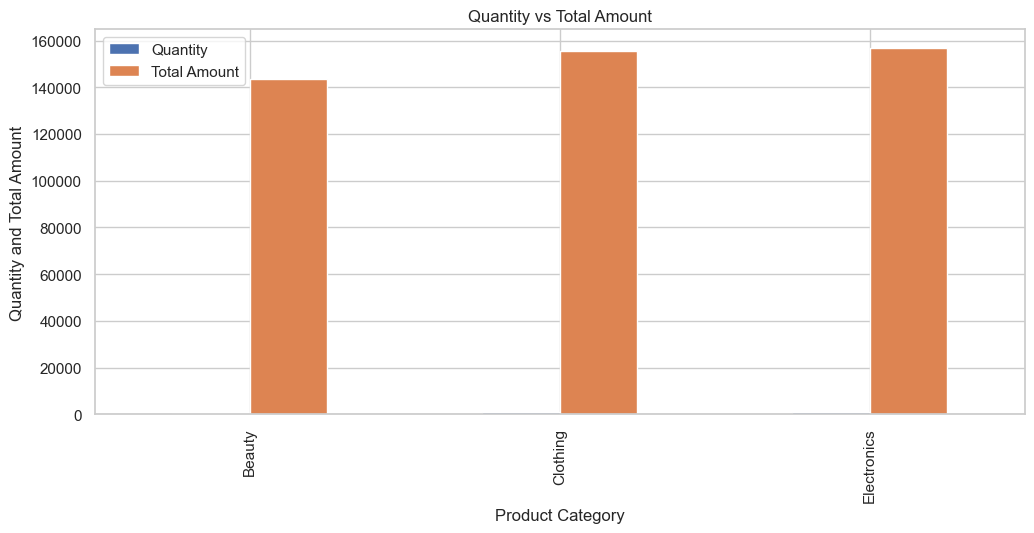

In [156]:
p.plot(kind="bar",figsize=(12,5))
plt.title("Quantity vs Total Amount")
plt.ylabel("Quantity and Total Amount")
plt.show()


In [157]:
cate=df["Product Category"].value_counts()

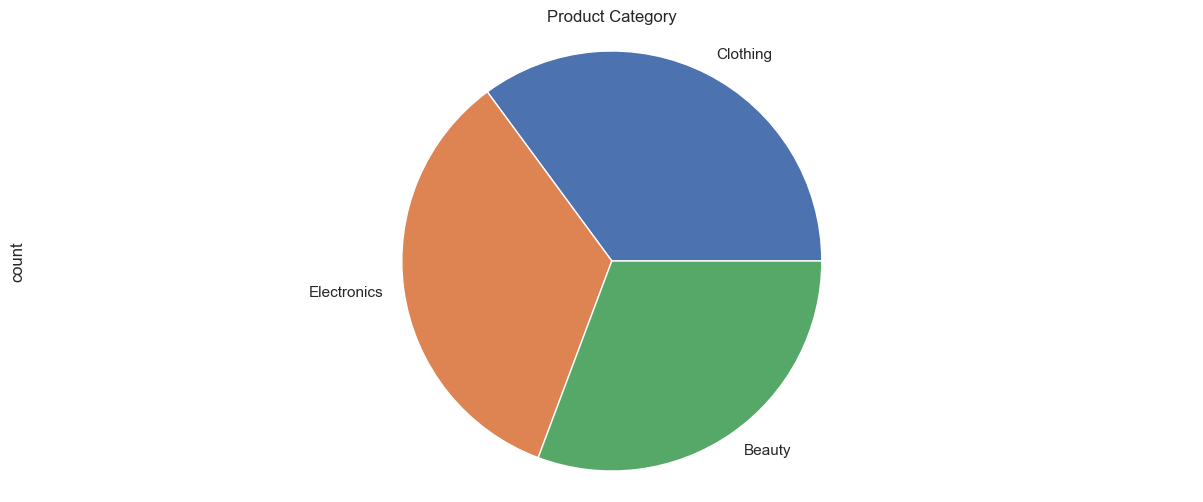

In [158]:
explode_list=[0,0.1,0.1]
color_list=["Red","Blue","Seagreen"]
cate.plot(kind="pie",figsize=(15,6))
plt.title("Product Category")
plt.axis("equal")
plt.show()

In [159]:
gen=df["Gender"].value_counts()
gen

Gender
Female    510
Male      490
Name: count, dtype: int64

Coral Female, Blue Male


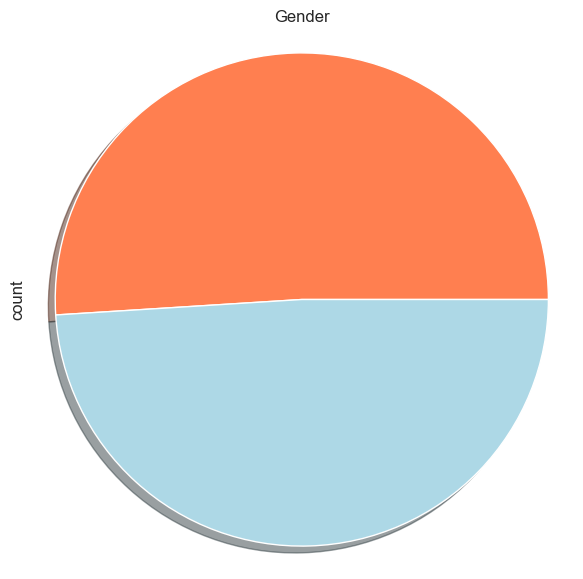

In [160]:
gen.plot(kind="pie", figsize=(7,7), shadow=True, labels=None, colors=["coral", "lightblue"])

print("Coral Female, Blue Male")

plt.title("Gender")

plt.axis("equal")

plt.show()

In [161]:
df["Price per Unit"].corr(df["Total Amount"])

np.float64(0.8519248403554038)

<Axes: xlabel='Price per Unit', ylabel='Total Amount'>

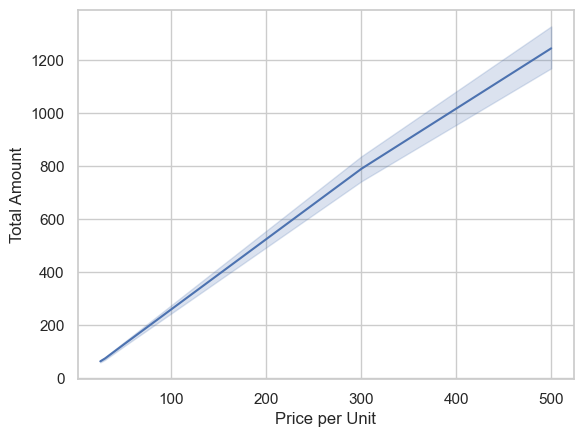

In [162]:
sns.lineplot(x="Price per Unit", y="Total Amount", data=df)